In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json


root_folder = 'C:/Users/Sankalp/Desktop/Projects/Premier League Prediction/premier_league_prediction_project'


In [27]:
def create_stats_table(soup, year):
    # Set General stats for every team
    print("\tCompiling General Stats")
    general_stats_table_id = f"results{year}-{year+1}91_overall"
    pl_general_stats_table = soup.find("table", attrs={"id": general_stats_table_id})
    general_stats = ['goals_for', 'goals_against', 'xg_for', 'xg_against']
    team_stats = {i.td.a.text:{} for i in pl_general_stats_table.tbody.find_all("tr")}
    for team_row in pl_general_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')         
            if stat in general_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Shooting stats for every team
    print("\tCompiling Shooting Stats")
    pl_shooting_stats_table = soup.find("table", attrs={"id": "stats_squads_shooting_for"})
    shooting_stats = ['shots', 'shots_on_target', 'average_shot_distance', 'shots_free_kicks', 'pens_made', 'pens_att']
    for team_row in pl_shooting_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in shooting_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Passing stats for every team
    print("\tCompiling Passing Stats")
    pl_passing_stats_table = soup.find("table", attrs={"id": "stats_squads_passing_for"})
    passing_stats = ['passes_into_final_third', 'assisted_shots', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes']
    for team_row in pl_passing_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in passing_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Goal and Shot Creation stats for every team
    print("\tCompiling Shot Creation Stats")
    pl_gca_stats_table = soup.find("table", attrs={"id": "stats_squads_gca_for"})
    goal_creation_stats = ['sca']
    for team_row in pl_gca_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in goal_creation_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Possession stats for every team
    print("\tCompiling Possession Stats")
    pl_possession_stats_table = soup.find("table", attrs={"id": "stats_squads_possession_for"})
    possession_stats = ['possession', 'touches_att_3rd', 'touches_att_pen_area', 'progressive_passes_received']
    for team_row in pl_possession_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in possession_stats: 
                team_stats[team_name][stat] = team_stat.text


    return team_stats


# Pass type stats

# "TB" - completed pass sent between back defenders into open space.

# Add this if you want

In [30]:
def prepare_season_table(year, debug=False):
    
    # try to load json file
    filename = 'season' + '_' + str(year)[2:] + '_' + str(year + 1)[2:]
    try:
        with open(f'{root_folder}/data/{filename}.json') as f:
            season_stats = json.load(f)

    # if stats file does not exist, create one
    except:
        print(f"{filename}.json not found. Creating...")
        base_url = "https://fbref.com/en/comps/9/"
        url = base_url + f"{year}-{year+1}/{year}-{year+1}-Premier-League-Stats"
        data = requests.get(url)
        soup = BeautifulSoup(data.text)
        # print(soup)
        season_stats = create_stats_table(soup, year)

        # save the file as json
        with open(f"{root_folder}/data/{filename}.json", "w") as outfile:
            json.dump(season_stats, outfile)

    
    if debug: print(json.dumps(season_stats, indent=2))

    return season_stats


In [32]:
# Prepare data for each season
season_23_24 = prepare_season_table(2023)
season_22_23 = prepare_season_table(2022)
season_21_22 = prepare_season_table(2021)
season_20_21 = prepare_season_table(2020)
season_19_20 = prepare_season_table(2019)
season_18_29 = prepare_season_table(2018)
season_17_18 = prepare_season_table(2017, debug=True)

In [45]:
# # Convert json files to DataFrames
# season_23_24 = pd.DataFrame(season_23_24)
# season_22_23 = pd.DataFrame(season_22_23)
# season_21_22 = pd.DataFrame(season_21_22)
# season_20_21 = pd.DataFrame(season_20_21)
# season_19_20 = pd.DataFrame(season_19_20)
# season_18_29 = pd.DataFrame(season_18_29)
# season_17_18 = pd.DataFrame(season_17_18)

In [44]:
full_data = pd.concat([pd.DataFrame(file).transpose() for file in [season_23_24, season_22_23, season_21_22, season_20_21, season_19_20, season_18_29, season_17_18]])
display(full_data)

,goals_for,goals_against,xg_for,xg_against,shots,shots_on_target,average_shot_distance,shots_free_kicks,pens_made,pens_att,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,sca,possession,touches_att_3rd,touches_att_pen_area,progressive_passes_received
Manchester City,16,3,13.5,4.6,102,42,16.4,5,1,2,86,282,71,9,289,196,66.0,1264,179,286
Liverpool,15,5,13.2,7.0,101,29,17.0,4,1,2,76,205,56,7,286,183,55.2,1037,188,282
Brighton,18,8,12.5,9.9,105,47,17.5,1,1,1,92,218,76,16,303,194,62.3,1126,207,301
Tottenham,15,7,10.9,8.7,114,44,17.0,1,0,0,85,250,77,9,317,198,59.3,1269,237,315
Arsenal,11,6,11.1,5.5,88,31,16.3,0,3,3,68,286,84,12,328,164,63.0,1416,212,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Huddersfield,28,58,31.3,48.5,360,106,18.8,14,2,2,260,937,180,77,1210,621,45.7,5064,533,1189
Southampton,37,56,39.9,45.2,447,136,18.1,11,3,3,343,1154,288,77,1609,799,51.3,5644,700,1592
Swansea City,28,56,31.6,58.6,338,95,18.2,15,1,1,223,973,190,57,1194,581,45.3,4554,536,1174
Stoke City,35,68,36.5,62.5,380,122,18.1,11,0,3,288,921,230,60,1150,669,41.4,4268,596,1123


<Axes: >

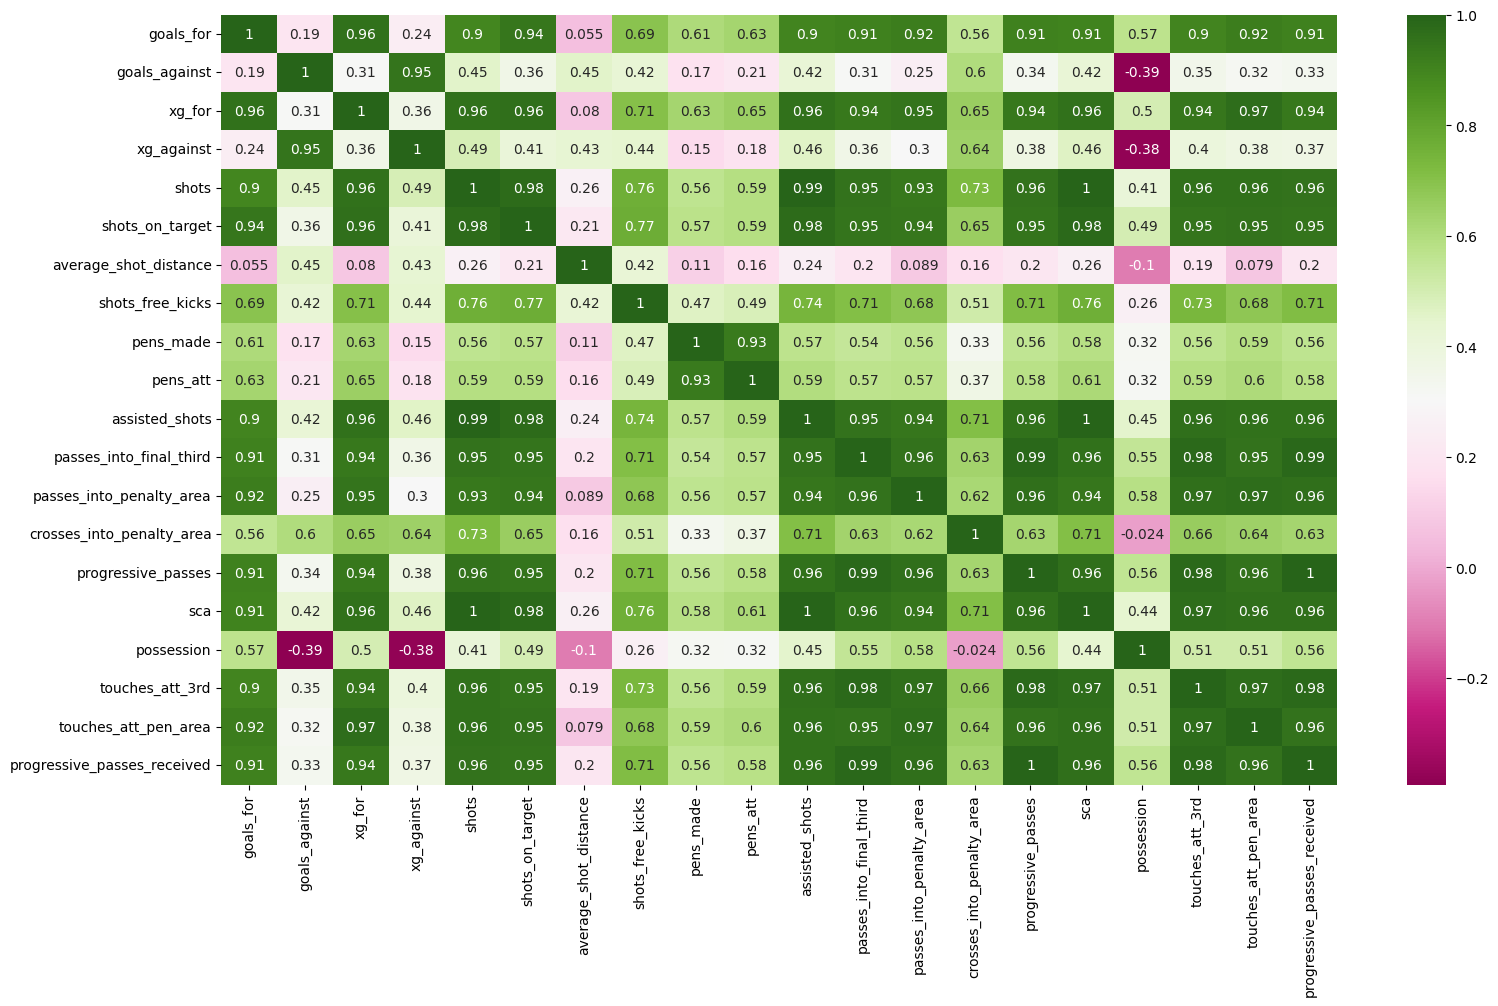

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(full_data.corr(), annot=True, cmap='PiYG')

We can see that almost every metric has a very good correlation with Points.